In [120]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [121]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [122]:
len(x_train)

60000

In [123]:
x_train[0:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [124]:
x_train.shape

(60000, 28, 28)

In [125]:
x_train = x_train / 255
x_test = x_test / 255

In [126]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

5


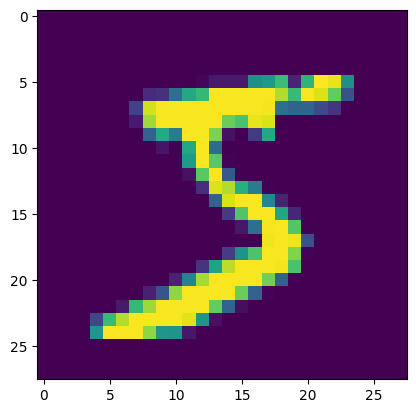

In [127]:
print(y_train[0])
plt.imshow(x_train[0])

In [128]:
x_train_flattened = x_train.reshape(60000,28*28)
x_test_flattened = x_test.reshape(10000,28*28)

In [129]:
x_train_flattened.shape

(60000, 784)

In [130]:
model = tf.keras.Sequential(
    # tf.keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
)

In [131]:
model.add(tf.keras.layers.Dense(10,input_shape=(784,),activation="sigmoid"))

In [132]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [133]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4654 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9258


In [134]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2672 - accuracy: 0.9270


[0.2672409415245056, 0.9269999861717224]

In [135]:
y_pred = model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


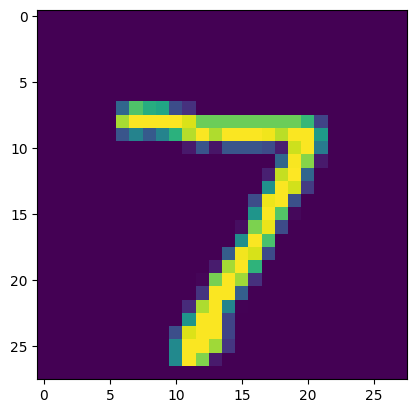

In [137]:
plt.imshow(x_test[0])

In [138]:
y_pred[0]

array([2.1145711e-02, 4.5736260e-07, 8.2550652e-02, 9.5982373e-01,
       2.5498366e-03, 8.9077473e-02, 1.8846733e-06, 9.9978620e-01,
       9.1148891e-02, 6.8123782e-01], dtype=float32)

In [140]:
np.argmax(y_pred[0])

7

In [141]:
y_pred = [np.argmax(i) for i in y_pred]

In [142]:
y_pred[0]

7

In [143]:
tf.math.confusion_matrix(labels=y_test, predictions = y_pred)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   5,    8,  945,   15,    8,    1,   11,    9,   26,    4],
       [   3,    0,   26,  929,    2,   11,    2,    8,   20,    9],
       [   1,    2,    6,    0,  916,    0,   10,    4,    8,   35],
       [   9,    3,    5,   44,   11,  757,   18,    6,   32,    7],
       [  11,    3,    7,    1,    7,    8,  918,    2,    1,    0],
       [   1,    7,   25,    6,    8,    0,    0,  937,    2,   42],
       [   8,   11,    8,   24,    9,   24,   10,   10,  860,   10],
       [  10,    7,    2,   10,   28,    5,    0,   14,    6,  927]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

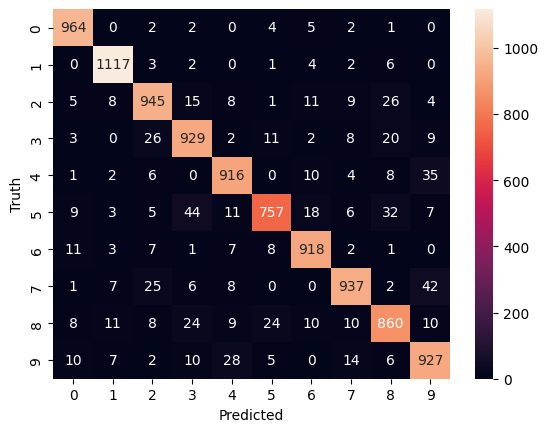

In [148]:
import seaborn as sns
sns.heatmap(tf.math.confusion_matrix(labels=y_test, predictions = y_pred),annot=True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [150]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(120,input_shape=(784,),activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")
])

In [158]:
model.compile(optimizer="adam",loss= "sparse_categorical_crossentropy",metrics=["accuracy"])

In [159]:
model.fit(x_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 67s 4ms/step - loss: 0.0402 - accuracy: 0.9870
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0288 - accuracy: 0.9913
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0248 - accuracy: 0.9921
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0191 - accuracy: 0.9941
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0165 - accuracy: 0.9947


In [160]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.0806 - accuracy: 0.9775


[0.0806148499250412, 0.9775000214576721]

In [161]:
y_p = model.predict(x_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [164]:
y_p = [np.argmax(i) for i in y_p]

Text(50.722222222222214, 0.5, 'Truth')

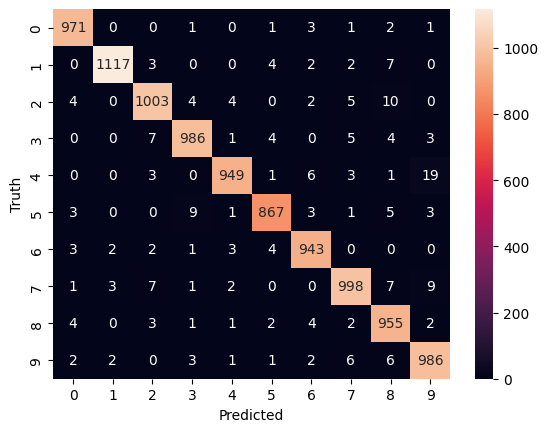

In [165]:
sns.heatmap(tf.math.confusion_matrix(labels=y_test, predictions = y_p),annot=True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")